**Project Title :Predicting Default Risk of Lending Club Loans**

Objective:

Our main objective for this project is to implement some of the classification algorithms in order to build models to classify a good or bad loan with help of selected variables.

**Dataset:**

The dataset includes detailed information for every loan issued by Lending Club for year 2015.

The dataset from Lending Club contains 74 features that will be employed to train our model for prediction. Not all of the fields are intuitively useful for our learning models, such as the loan ID and the month the last payment was received, and thus we removed such fields. 

We also removed fields for which greater than 80% of the values were missing.

Number of Features: 74
Number of records: 403697

**Questions:**

1) Which features contributes the most?


**Feature Selection**

1) Lasso Regression
2) Principle Component Analysis
3) Recursive Feature Elimination
4) Random Forest for Feature Ranking

**Models**

1) Random Forest
2) Logistic Regression
3) Support Vector Machine
4) K Nearest Neighbors(KNN)
5) Decision Tree


In [1]:
import pandas as pd
import numpy as np

In [2]:
loans_2015 = pd.read_csv('loan2015new.csv', low_memory=False) 

In [3]:
loans_2015.shape

(403697, 74)

In [4]:
loans_2015.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', '

In [5]:
eighty_count = len(loans_2015)*4 / 5

In [6]:
loans_2015 = loans_2015.dropna(thresh=eighty_count,axis=1)

In [7]:
loans_2015.shape

(403697, 53)

In [8]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')

In [9]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name','Description': 'description'})

In [10]:
loan_df = pd.DataFrame(data=loans_2015)

In [11]:
loans_df_dtypes = pd.DataFrame(loan_df.dtypes,columns=['dtypes'])
loans_df_dtypes = loans_df_dtypes.reset_index()
loans_df_dtypes['name'] = loans_df_dtypes['index']
loans_df_dtypes = loans_df_dtypes[['name','dtypes']]
loans_df_dtypes['first value'] = loan_df.loc[0].values
preview = loans_df_dtypes.merge(data_dictionary, on='name',how='left')

In [12]:
preview

name   dtypes  \
0                           id    int64   
1                    member_id    int64   
2                    loan_amnt    int64   
3                  funded_amnt    int64   
4              funded_amnt_inv    int64   
5                         term   object   
6                     int_rate  float64   
7                  installment  float64   
8                        grade   object   
9                    sub_grade   object   
10                   emp_title   object   
11                  emp_length   object   
12              home_ownership   object   
13                  annual_inc  float64   
14         verification_status   object   
15                     issue_d   object   
16                  pymnt_plan   object   
17                         url   object   
18                     purpose   object   
19                       title   object   
20                    zip_code   object   
21                  addr_state   object   
22                         dti  float64   
23                 delinq_2yrs    int64   
24            earliest_cr_line   object   
25              inq_last_6mths    int64   
26                    open_acc    int64   
27                     pub_rec    int64   
28                   revol_bal    int64   
29                  revol_util  float64   
30                   total_acc    int64   
31         initial_list_status   object   
32                   out_prncp  float64   
33               out_prncp_inv  float64   
34                 total_pymnt  float64   
35             total_pymnt_inv  float64   
36             total_rec_prncp  float64   
37               total_rec_int  float64   
38          total_rec_late_fee  float64   
39                  recoveries  float64   
40     collection_recovery_fee  float64   
41                last_pymnt_d   object   
42             last_pymnt_amnt  float64   
43                next_pymnt_d   object   
44          last_credit_pull_d   object   
45  collections_12_mths_ex_med    int64   
46                 policy_code    int64   
47            application_type   object   
48              acc_now_delinq    int64   
49                tot_coll_amt    int64   
50                 tot_cur_bal    int64   
51            total_rev_hi_lim    int64   
52                 loan_status   object   

                                          first value  \
0                                            68587652   
1                                            73477494   
2                                               25000   
3                                               25000   
4                                               25000   
5                                           36 months   
6                                                5.32   
7                                              752.87   
8                                                   A   
9                                                  A1   
10                                           Director   
11                                             1 year   
12                                           MORTGAGE   
13                                             150000   
14                                       Not Verified   
15                                             15-Dec   
16                                                  n   
17  https://www.lendingclub.com/browse/loanDetail....   
18                                        credit_card   
19                            Credit card refinancing   
20                                              054xx   
21                                                 VT   
22                                               9.54   
23                                                  0   
24                                             Feb-96   
25                                                  0   
26                                                  7   
27                                                  0   
28                                              19

In [13]:
preview[:19]

name   dtypes  \
0                    id    int64   
1             member_id    int64   
2             loan_amnt    int64   
3           funded_amnt    int64   
4       funded_amnt_inv    int64   
5                  term   object   
6              int_rate  float64   
7           installment  float64   
8                 grade   object   
9             sub_grade   object   
10            emp_title   object   
11           emp_length   object   
12       home_ownership   object   
13           annual_inc  float64   
14  verification_status   object   
15              issue_d   object   
16           pymnt_plan   object   
17                  url   object   
18              purpose   object   

                                          first value  \
0                                            68587652   
1                                            73477494   
2                                               25000   
3                                               25000   
4                                               25000   
5                                           36 months   
6                                                5.32   
7                                              752.87   
8                                                   A   
9                                                  A1   
10                                           Director   
11                                             1 year   
12                                           MORTGAGE   
13                                             150000   
14                                       Not Verified   
15                                             15-Dec   
16                                                  n   
17  https://www.lendingclub.com/browse/loanDetail....   
18                                        credit_card   

                                          description  Unnamed: 2  Unnamed: 3  \
0       A unique LC assigned ID for the loan listing.         NaN         NaN   
1    A unique LC assigned Id for the borrower member.         NaN         NaN   
2   The listed amount of the loan applied for by t...         NaN         NaN   
3   The total amount committed to that loan at tha...         NaN         NaN   
4   The total amount committed by investors for th...         NaN         NaN   
5   The number of payments on the loan. Values are...         NaN         NaN   
6                           Interest Rate on the loan         NaN         NaN   
7   The monthly payment owed by the borrower if th...         NaN         NaN   
8                              LC assigned loan grade         NaN         NaN   
9                           LC assigned loan subgrade         NaN         NaN   
10  The job title supplied by the Borrower when ap...         NaN         NaN   
11  Employment length in years. Possible values ar...         NaN         NaN   
12  The home ownership status provided by the borr...         NaN         NaN   
13  The self-reported annual income provided by th...         NaN         NaN   
14                                                NaN         NaN         NaN   
15                The month which the loan was funded         NaN         NaN   
16  Indicates if a payment plan has been put in pl...         NaN         NaN   
17             URL for the LC page with listing data.         NaN         NaN   
18  A category provided by the borrower for the lo...         NaN         NaN   

    Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN      

In [14]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d','url']
loan_df = loan_df.drop(drop_list,axis=1)

In [15]:
loan_df.shape

(403697, 44)

In [16]:
preview[19:38]

name   dtypes              first value  \
19                title   object  Credit card refinancing   
20             zip_code   object                    054xx   
21           addr_state   object                       VT   
22                  dti  float64                     9.54   
23          delinq_2yrs    int64                        0   
24     earliest_cr_line   object                   Feb-96   
25       inq_last_6mths    int64                        0   
26             open_acc    int64                        7   
27              pub_rec    int64                        0   
28            revol_bal    int64                    19339   
29           revol_util  float64                     42.5   
30            total_acc    int64                       18   
31  initial_list_status   object                        w   
32            out_prncp  float64                    24358   
33        out_prncp_inv  float64                    24358   
34          total_pymnt  float64                   682.67   
35      total_pymnt_inv  float64                   682.67   
36      total_rec_prncp  float64                   642.03   
37        total_rec_int  float64                    40.64   

                                          description  Unnamed: 2  Unnamed: 3  \
19            The loan title provided by the borrower         NaN         NaN   
20  The first 3 numbers of the zip code provided b...         NaN         NaN   
21  The state provided by the borrower in the loan...         NaN         NaN   
22  A ratio calculated using the borrower’s total ...         NaN         NaN   
23  The number of 30+ days past-due incidences of ...         NaN         NaN   
24  The month the borrower's earliest reported cre...         NaN         NaN   
25  The number of inquiries in past 6 months (excl...         NaN         NaN   
26  The number of open credit lines in the borrowe...         NaN         NaN   
27                Number of derogatory public records         NaN         NaN   
28                     Total credit revolving balance         NaN         NaN   
29  Revolving line utilization rate, or the amount...         NaN         NaN   
30  The total number of credit lines currently in ...         NaN         NaN   
31  The initial listing status of the loan. Possib...         NaN         NaN   
32  Remaining outstanding principal for total amou...         NaN         NaN   
33  Remaining outstanding principal for portion of...         NaN         NaN   
34  Payments received to date for total amount funded         NaN         NaN   
35  Payments received to date for portion of total...         NaN         NaN   
36                         Principal received to date         NaN         NaN   
37                          Interest received to date         NaN         NaN   

    Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
19         NaN         NaN         NaN         NaN         NaN         NaN   
20         NaN         NaN         NaN         NaN         NaN         NaN   
21         NaN         NaN         NaN         NaN         NaN         NaN   
22         NaN         NaN         NaN         NaN         NaN         NaN   
23         NaN         NaN         NaN         NaN         NaN         NaN   
24         NaN         NaN         NaN         NaN         NaN         NaN   
25         NaN         NaN         NaN         NaN         NaN         NaN   
26         NaN         NaN         NaN         NaN         NaN         NaN   
27         NaN         NaN         NaN         NaN         NaN         NaN   
28         NaN         NaN         NaN         NaN         NaN         NaN   
29         NaN         NaN         NaN         NaN         NaN         NaN   
30         NaN         NaN         NaN         NaN         NaN         NaN   
31         NaN         NaN         NaN         NaN         NaN         NaN   
32         NaN         NaN         NaN         NaN         NaN         NaN   
33     

In [17]:
drop_cols = ['zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv']
loan_df = loan_df.drop(drop_cols, axis=1)

In [18]:
loan_df.shape

(403697, 39)

In [19]:
preview[38:]

name   dtypes first value  \
38          total_rec_late_fee  float64           0   
39                  recoveries  float64           0   
40     collection_recovery_fee  float64           0   
41                last_pymnt_d   object      16-Jan   
42             last_pymnt_amnt  float64      701.14   
43                next_pymnt_d   object      16-Feb   
44          last_credit_pull_d   object      16-Jan   
45  collections_12_mths_ex_med    int64           0   
46                 policy_code    int64           1   
47            application_type   object  INDIVIDUAL   
48              acc_now_delinq    int64           0   
49                tot_coll_amt    int64           0   
50                 tot_cur_bal    int64      430856   
51            total_rev_hi_lim    int64       45500   
52                 loan_status   object     Current   

                                          description  Unnamed: 2  Unnamed: 3  \
38                         Late fees received to date         NaN         NaN   
39                     post charge off gross recovery         NaN         NaN   
40                     post charge off collection fee         NaN         NaN   
41                    Last month payment was received         NaN         NaN   
42                 Last total payment amount received         NaN         NaN   
43                        Next scheduled payment date         NaN         NaN   
44  The most recent month LC pulled credit for thi...         NaN         NaN   
45  Number of collections in 12 months excluding m...         NaN         NaN   
46  publicly available policy_code=1\nnew products...         NaN         NaN   
47  Indicates whether the loan is an individual ap...         NaN         NaN   
48  The number of accounts on which the borrower i...         NaN         NaN   
49                 Total collection amounts ever owed         NaN         NaN   
50              Total current balance of all accounts         NaN         NaN   
51                                                NaN         NaN         NaN   
52                         Current status of the loan         NaN         NaN   

    Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
38         NaN         NaN         NaN         NaN         NaN         NaN   
39         NaN         NaN         NaN         NaN         NaN         NaN   
40         NaN         NaN         NaN         NaN         NaN         NaN   
41         NaN         NaN         NaN         NaN         NaN         NaN   
42         NaN         NaN         NaN         NaN         NaN         NaN   
43         NaN         NaN         NaN         NaN         NaN         NaN   
44         NaN         NaN         NaN         NaN         NaN         NaN   
45         NaN         NaN         NaN         NaN         NaN         NaN   
46         NaN         NaN         NaN         NaN         NaN         NaN   
47         NaN         NaN         NaN         NaN         NaN         NaN   
48         NaN         NaN         NaN         NaN         NaN         NaN   
49         NaN         NaN         NaN         NaN         NaN         NaN   
50         NaN         NaN         NaN         NaN         NaN         NaN   
51         NaN         NaN         NaN         NaN         NaN         NaN   
52         NaN         NaN         NaN         NaN         NaN         NaN   

    Unnamed: 10  
38          NaN  
39          NaN  
40          NaN  
41          NaN  
42          NaN  
43          NaN  
44          NaN  
45          NaN  
46          NaN  
47          NaN  
48          NaN  
49          NaN  
50          NaN  
51          NaN  
52          NaN

In [20]:
drop_cols = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d']

loan_df = loan_df.drop(drop_cols, axis=1)

In [21]:
loan_df.shape

(403697, 33)

In [22]:
loan_df["loan_status"].value_counts()

Current        377553
Fully Paid      22984
Charged Off      2773
Default           387
Name: loan_status, dtype: int64

In [23]:
loan_df = loan_df[(loan_df["loan_status"] == "Fully Paid") |
                            (loan_df["loan_status"] == "Charged Off")]

mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loan_df = loan_df.replace(mapping_dictionary)

In [24]:
loan_df = loan_df.loc[:,loan_df.apply(pd.Series.nunique) != 1]

In [25]:
for col in loan_df.columns:
    if (len(loan_df[col].unique()) < 4):
        print(loan_df[col].value_counts())
        print()

 36 months    18102
 60 months     7655
Name: term, dtype: int64

MORTGAGE    12824
RENT        10026
OWN          2907
Name: home_ownership, dtype: int64

Source Verified    10678
Verified            8132
Not Verified        6947
Name: verification_status, dtype: int64

w    13615
f    12142
Name: initial_list_status, dtype: int64

Series([], Name: next_pymnt_d, dtype: int64)

INDIVIDUAL    25756
JOINT             1
Name: application_type, dtype: int64

0    25612
1      135
2       10
Name: acc_now_delinq, dtype: int64

1    22984
0     2773
Name: loan_status, dtype: int64



In [26]:
print(loan_df.shape[1])
loan_df = loan_df.drop('application_type', axis=1)
print("We've been able to reduced the features to => {}".format(loan_df.shape[1]))

31
We've been able to reduced the features to => 30


In [27]:
loan_df = loan_df[(loan_df["initial_list_status"] == "w") |
                            (loan_df["initial_list_status"] == "f")]

mapping_dictionary = {"initial_list_status":{ "w": 1, "f": 0}}
loan_df = loan_df.replace(mapping_dictionary)

In [28]:
loan_df.to_csv("filtered_loans_2015.csv",index=False)

**Handle missing values and categorical features before feeding the data into a machine learning algorithm**

In [29]:
filtered_loans = pd.read_csv('filtered_loans_2015.csv')
print(filtered_loans.shape)
filtered_loans.head()

(25757, 30)


loan_amnt        term  installment grade emp_length home_ownership  \
0      19800   36 months       666.00     C    7 years       MORTGAGE   
1      35000   36 months      1177.27     C  10+ years           RENT   
2      20000   36 months       672.73     C    6 years       MORTGAGE   
3      28000   60 months       635.37     C    5 years       MORTGAGE   
4      23100   60 months       605.35     E  10+ years       MORTGAGE   

   annual_inc verification_status             purpose               title  \
0     78924.0        Not Verified  debt_consolidation  Debt consolidation   
1     95000.0     Source Verified                 car       Car financing   
2     56000.0        Not Verified  debt_consolidation  Debt consolidation   
3     96000.0        Not Verified  debt_consolidation  Debt consolidation   
4     55000.0     Source Verified  debt_consolidation  Debt consolidation   

      ...      initial_list_status  last_pymnt_amnt  next_pymnt_d  \
0     ...                        1         19906.26           NaN   
1     ...                        1         35187.84           NaN   
2     ...                        1         20045.09           NaN   
3     ...                        1         28063.12           NaN   
4     ...                        1         23178.75           NaN   

  last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
0             16-Jan                           0               0   
1             16-Jan                           0               0   
2             16-Jan                           0               0   
3             16-Jan                           0               0   
4             16-Jan                           0               0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  loan_status  
0             0       138611             51700            1  
1             0        18219             40400            1  
2             0       202156             13600            1  
3             0       219222             69300            1  
4          3090       183546             32700            1  

[5 rows x 30 columns]

In [30]:
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                         0
term                              0
installment                       0
grade                             0
emp_length                     1224
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
title                             0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       13
total_acc                         0
initial_list_status               0
last_pymnt_amnt                   0
next_pymnt_d                  25757
last_credit_pull_d                0
collections_12_mths_ex_med        0
acc_now_delinq                    0
tot_coll_amt              

**Remove entire column next_pymnt_d column as data is missing for entire filtered loans dataset. Drop the missing rows for revol_util**

In [31]:
filtered_loans = filtered_loans.drop("next_pymnt_d",axis=1)
filtered_loans = filtered_loans.dropna()

In [32]:
filtered_loans.shape

(24520, 29)

**Convert categorical values to numerical**

In [33]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
int64      14
object     10
float64     5
dtype: int64


In [34]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                            36 months
grade                                   C
emp_length                        7 years
home_ownership                   MORTGAGE
verification_status          Not Verified
purpose                debt_consolidation
title                  Debt consolidation
addr_state                             MD
earliest_cr_line                    5-Oct
last_credit_pull_d                 16-Jan
Name: 0, dtype: object


In [35]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
MORTGAGE    12264
RENT         9593
OWN          2663
Name: home_ownership, dtype: int64 

grade :
C    7172
B    5685
D    4405
A    3192
E    2775
F    1010
G     281
Name: grade, dtype: int64 

verification_status :
Source Verified    10438
Verified            7219
Not Verified        6863
Name: verification_status, dtype: int64 

emp_length :
10+ years    8850
2 years      2321
< 1 year     2095
3 years      1952
1 year       1694
4 years      1504
5 years      1460
8 years      1311
7 years      1199
6 years      1092
9 years      1042
Name: emp_length, dtype: int64 

term :
 36 months    17074
 60 months     7446
Name: term, dtype: int64 

addr_state :
CA    3974
TX    1989
NY    1774
FL    1667
IL     857
NJ     799
GA     780
PA     775
VA     765
OH     763
NC     721
MI     661
CO     637
AZ     617
MD     600
WA     596
MA     516
MN     499
IN     399
NV     393
MO     351
TN     347
OR     340
WI     328
AL     310
LA     300
CT     276
SC     255
UT     2

In [36]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    15364
credit_card            4298
home_improvement       1626
other                  1367
major_purchase          523
medical                 252
small_business          246
car                     243
moving                  217
house                   196
vacation                171
renewable_energy         16
wedding                   1
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation         15357
Credit card refinancing     4306
Home improvement            1627
Other                       1367
Major purchase               521
Medical expenses             252
Business                     245
Car financing                243
Moving and relocation        217
Home buying                  197
Vacation                     171
Green loan                    16
Credit Card/Auto Repair        1
Name: title, dtype: int64 



**The purpose and title columns do contain overlapping information, but the purpose column contains fewer discrete values and is cleaner, so we'll keep it and drop title. The addr_state column, however,contains too many unique values, so it's better to drop this**

In [37]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line','purpose']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

**Convert Ordinal values to numerical values**

In [38]:
filtered_loans['grade'] = filtered_loans['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
filtered_loans["home_ownership"] = filtered_loans["home_ownership"].map({"MORTGAGE":3,"RENT":2,"OWN":1})
filtered_loans["emp_length"] = filtered_loans["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
filtered_loans["emp_length"] = filtered_loans["emp_length"].apply(lambda x:int(x))
filtered_loans['verification_status'] = filtered_loans['verification_status'].map({'Source Verified':1,'Verified':2,'Not Verified':3})
filtered_loans["term"] = filtered_loans["term"].map({" 36 months":0," 60 months":1})
print("Current shape of dataset :",filtered_loans.shape)
filtered_loans.head()

Current shape of dataset : (24520, 24)


loan_amnt  term  installment  grade  emp_length  home_ownership  \
0      19800     0       666.00      5           7               3   
1      35000     0      1177.27      5          10               2   
2      20000     0       672.73      5           6               3   
3      28000     1       635.37      5           5               3   
4      23100     1       605.35      3          10               3   

   annual_inc  verification_status    dti  delinq_2yrs     ...       \
0     78924.0                    3  13.12            0     ...        
1     95000.0                    1   7.19            0     ...        
2     56000.0                    3  22.40            0     ...        
3     96000.0                    3  31.00            0     ...        
4     55000.0                    1  22.24            0     ...        

   revol_util  total_acc  initial_list_status  last_pymnt_amnt  \
0        24.7         27                    1         19906.26   
1        33.6         23                    1         35187.84   
2        46.8         29                    1         20045.09   
3        66.0         39                    1         28063.12   
4        11.8         40                    1         23178.75   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                           0               0             0       138611   
1                           0               0             0        18219   
2                           0               0             0       202156   
3                           0               0             0       219222   
4                           0               0          3090       183546   

   total_rev_hi_lim  loan_status  
0             51700            1  
1             40400            1  
2             13600            1  
3             69300            1  
4             32700            1  

[5 rows x 24 columns]

**Convert Nominal values to numeric values**

In [39]:
filtered_loans.to_csv("cleaned_loans_2015.csv",index=False)

In [40]:
filtered_loans.shape

(24520, 24)

In [41]:
X = filtered_loans.iloc[:,0:22]
y = filtered_loans.iloc[:,-1]

In [42]:
X.head()

loan_amnt  term  installment  grade  emp_length  home_ownership  \
0      19800     0       666.00      5           7               3   
1      35000     0      1177.27      5          10               2   
2      20000     0       672.73      5           6               3   
3      28000     1       635.37      5           5               3   
4      23100     1       605.35      3          10               3   

   annual_inc  verification_status    dti  delinq_2yrs     ...       pub_rec  \
0     78924.0                    3  13.12            0     ...             0   
1     95000.0                    1   7.19            0     ...             0   
2     56000.0                    3  22.40            0     ...             0   
3     96000.0                    3  31.00            0     ...             0   
4     55000.0                    1  22.24            0     ...             0   

   revol_bal  revol_util  total_acc  initial_list_status  last_pymnt_amnt  \
0      12736        24.7         27                    1         19906.26   
1      13576        33.6         23                    1         35187.84   
2       6365        46.8         29                    1         20045.09   
3      45751        66.0         39                    1         28063.12   
4       3857        11.8         40                    1         23178.75   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  
0                           0               0             0       138611  
1                           0               0             0        18219  
2                           0               0             0       202156  
3                           0               0             0       219222  
4                           0               0          3090       183546  

[5 rows x 22 columns]

In [43]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [44]:
#from sklearn import preprocessing,metrics 
from IPython.core.display import HTML

filtered_loans.fillna(filtered_loans.mean(),inplace = True)
HTML(filtered_loans.tail().to_html())
print("Current shape of dataset :",filtered_loans.shape)

Current shape of dataset : (24520, 24)


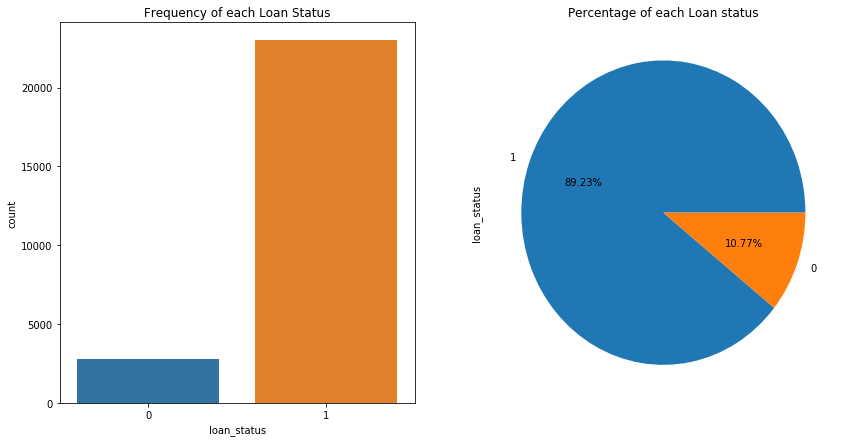

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loan_df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [46]:
from sklearn import preprocessing,metrics
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = filtered_loans.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(filtered_loans[fields]), columns = fields)
data_clean['loan_status'] = filtered_loans['loan_status']
data_clean['loan_status'].value_counts()

1.0    20980
0.0     2349
Name: loan_status, dtype: int64

In [47]:
from sklearn.utils import resample
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]
loanstatus_0_upsampled = resample(loanstatus_0, 
                                replace=True,     # sample with replacement
                                n_samples=20980,    # to match majority class
                                random_state=123) # reproducible results
data_clean = pd.concat([loanstatus_1, loanstatus_0_upsampled ])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)

loanstatus_0_upsampled.shape

Current shape of dataset : (41960, 24)


(20980, 24)

In [48]:
data_clean.corr()

loan_amnt      term  installment     grade  \
loan_amnt                    1.000000  0.433019     0.950589 -0.202430   
term                         0.433019  1.000000     0.186574 -0.458354   
installment                  0.950589  0.186574     1.000000 -0.194901   
grade                       -0.202430 -0.458354    -0.194901  1.000000   
emp_length                   0.076412  0.048117     0.066428 -0.001647   
home_ownership               0.109992  0.038313     0.097569  0.061206   
annual_inc                   0.294822  0.059206     0.284828  0.070204   
verification_status         -0.234274 -0.187036    -0.208154  0.122115   
dti                         -0.003172  0.086405    -0.005346 -0.194911   
delinq_2yrs                 -0.032476 -0.028717    -0.023814 -0.022596   
inq_last_6mths              -0.022413  0.012391     0.008326 -0.240502   
open_acc                     0.174362  0.071037     0.163990 -0.017775   
pub_rec                     -0.109177 -0.048776    -0.090736 -0.059380   
revol_bal                    0.314398  0.107049     0.293025  0.010290   
revol_util                   0.122229  0.095993     0.123895 -0.184627   
total_acc                    0.186861  0.096042     0.164434  0.021683   
initial_list_status          0.081325  0.171918     0.009073  0.158824   
last_pymnt_amnt              0.731339  0.328435     0.676710 -0.092043   
collections_12_mths_ex_med  -0.006036  0.017484    -0.007925 -0.024076   
acc_now_delinq               0.002094 -0.004472     0.007362 -0.023861   
tot_coll_amt                -0.027476 -0.011720    -0.024497 -0.001007   
tot_cur_bal                  0.313541  0.129540     0.280067  0.054332   
total_rev_hi_lim             0.355825  0.099929     0.321213  0.136132   
loan_status                  0.020323  0.016679     0.017058 -0.011887   

                            emp_length  home_ownership  annual_inc  \
loan_amnt                     0.076412        0.109992    0.294822   
term                          0.048117        0.038313    0.059206   
installment                   0.066428        0.097569    0.284828   
grade                        -0.001647        0.061206    0.070204   
emp_length                    1.000000        0.140317    0.049197   
home_ownership                0.140317        1.000000    0.104291   
annual_inc                    0.049197        0.104291    1.000000   
verification_status          -0.039206        0.036287   -0.065052   
dti                           0.014645       -0.031188   -0.184229   
delinq_2yrs                   0.032960        0.030581    0.019462   
inq_last_6mths               -0.011037        0.002088    0.027978   
open_acc                      0.015466        0.070838    0.090871   
pub_rec                       0.040947       -0.002355   -0.021088   
revol_bal                     0.041181        0.100795    0.265658   
revol_util                    0.050708        0.042090    0.043178   
total_acc                     0.102695        0.122894    0.140049   
initial_list_status           0.020358        0.045548    0.042221   
last_pymnt_amnt               0.089352        0.108965    0.238975   
collections_12_mths_ex_med    0.003867       -0.006698   -0.006703   
acc_now_delinq                0.006711       -0.019219    0.002839   
tot_coll_amt                  0.019367        0.001576   -0.005971   
tot_cur_bal                   0.086869        0.377190    0.383768   
total_rev_hi_lim              0.044091        0.101254    0.275908   
loan_status                   0.008971        0.001623    0.009767   

                            verification_status       dti  delinq_2yrs  \
loan_amnt                             -0.234274 -0.003172    -0.032476   
term                                  -0.187036  0.086405    -0.028717   
installment                           -0.208154 -0.005346    -0.023814   
grade                                  0.122115 -0.194911    -0.022596   
emp_length                            -0.039206  0.01464

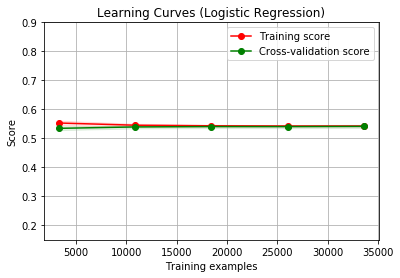

In [49]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.15, 0.90), cv=cv, n_jobs=4)
plt.show()

In [50]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [51]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42) #just for bootstrapping

In [53]:
#PCA (Principal Component Analysis)
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.16647943 0.08361354 0.07385726 0.07098453 0.06028705 0.05489836
 0.05138826 0.04908579 0.04697526 0.04396129]


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


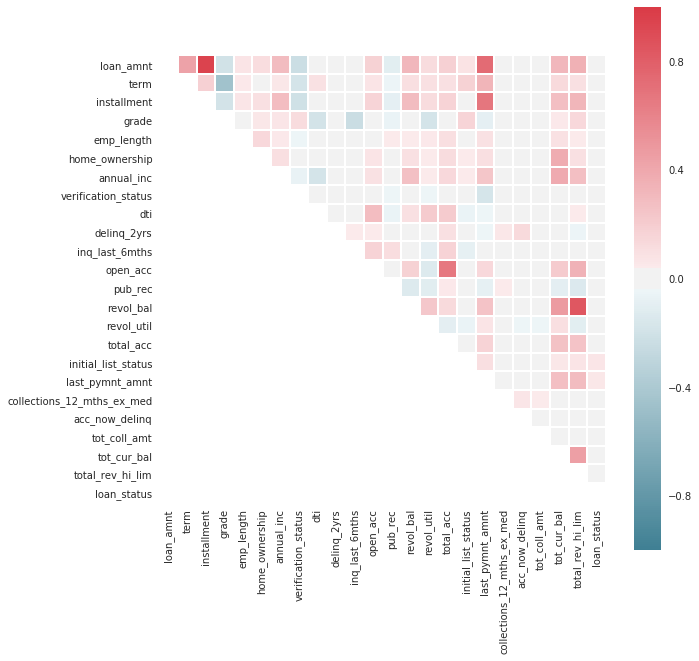

In [54]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

Feature ranking:
1. feature 8 (0.134019)
2. feature 4 (0.099906)
3. feature 7 (0.098578)
4. feature 0 (0.095823)
5. feature 6 (0.077986)
6. feature 5 (0.066192)
7. feature 2 (0.065415)
8. feature 3 (0.063437)
9. feature 9 (0.059985)
10. feature 1 (0.044657)
11. feature 11 (0.022180)
12. feature 10 (0.021810)
13. feature 16 (0.021685)
14. feature 12 (0.021542)
15. feature 17 (0.021533)
16. feature 14 (0.021354)
17. feature 18 (0.021346)
18. feature 13 (0.021307)
19. feature 15 (0.021246)


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


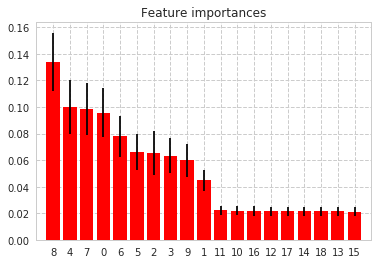

In [55]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=6767,
                           n_features=19,
                           n_informative=10,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


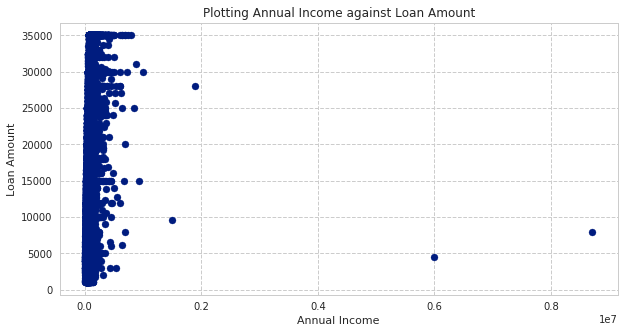

Text(0.5,0,'Annual Income')

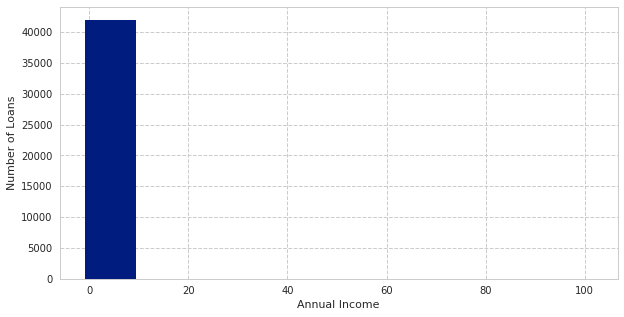

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(filtered_loans['annual_inc'], filtered_loans['loan_amnt'])
plt.title("Plotting Annual Income against Loan Amount")
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.show()

data_clean.annual_inc.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

In [57]:
data_clean = data_clean[data_clean['annual_inc']<200000]

In [58]:
X_Variables = ['emp_length', 'grade']
X = data_clean[X_Variables]
X = X.values
y = data_clean['loan_status'].values
clf = linear_model.LogisticRegression()
model = clf.fit(X,y)
model.score(X, y)
pd.DataFrame(list(zip(X_Variables,model.coef_.T)))

0                        1
0  emp_length    [0.01797923158494435]
1       grade  [-0.023928261318763456]

**Lets take a look at the co-efficient of grade a loan. For every additional increase in the grade "G" to "F" or in our case "1" to "2" the chance of the loan being paid off increases by 0.04 and it shows increase in emp_length by factor of 0.012**

In [59]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print(Best_classifier)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Logistic regression accuracy is  0.5400381315538608


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


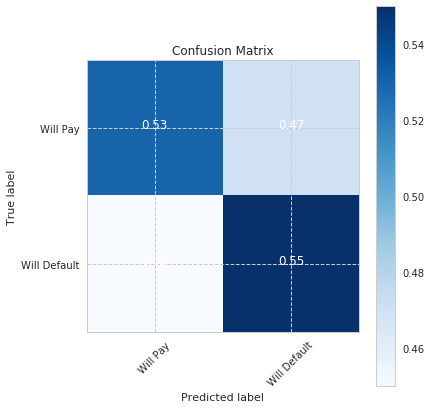

In [60]:
clf_LR = linear_model.LogisticRegression(C=0.01)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
#LR_Accuracytrain = accuracy_score(y_train,LR_Predict.round())
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())

print("Logistic regression accuracy is ",LR_Accuracy)
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



The optimal number of neighbors is 1.


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


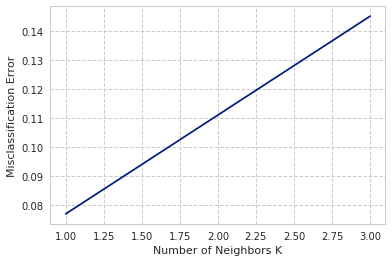

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

myList = list(range(0,5))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

KNN accuracy is  0.8816730219256435


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


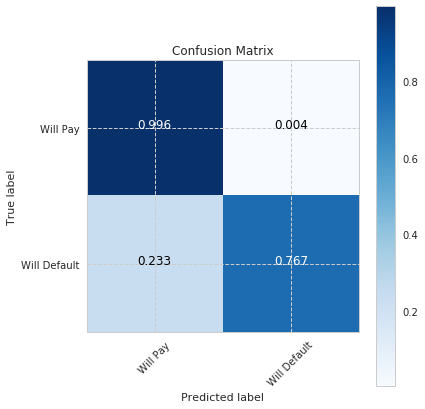

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train) 
LR_Predict_bin1 = neigh.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict_bin1.round())
print("KNN accuracy is ",LR_Accuracy)
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin1, normalize=True)
plt.show()

SVM accuracy is  0.680767397521449
SVM training accuracy is  0.7132983794089609


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


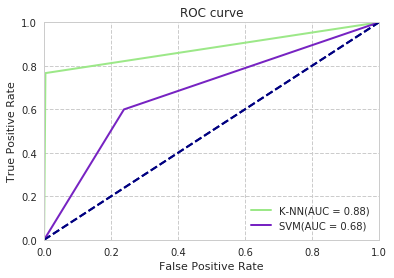

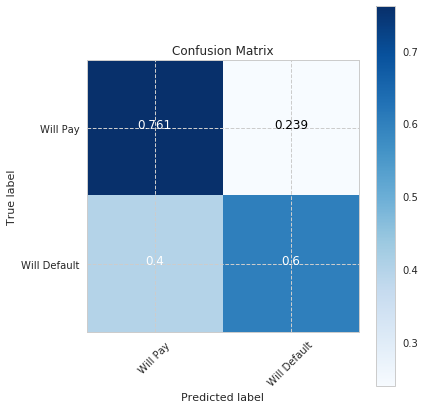

In [63]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train,y_train) 
#LR_Predict1 = clf_svm.predict_proba(X_test)[:,1]
LR_Predict_bin2 = clf_svm.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict_bin2.round())
print("SVM accuracy is ",LR_Accuracy)

LR_Predict_train = clf_svm.predict(X_train)
LR_Accuracy1 = accuracy_score(y_train,LR_Predict_train.round())
print("SVM training accuracy is ",LR_Accuracy1)

plotAUC(y_test,LR_Predict_bin1,'K-NN')
plotAUC(y_test,LR_Predict_bin2,'SVM')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin2, normalize=True)
plt.show()

In [64]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist
                          , cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.9851048617731173
0.9997616777883699


C:\Users\trish\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


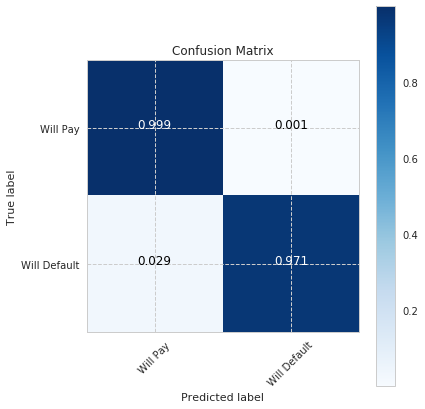

In [65]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0,n_estimators=10,max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=1,oob_score=False,verbose=0,warm_start=False)

randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredicttrain = randomForest.predict(X_train)
rfAccuracytrain = accuracy_score(y_train,rfPredicttrain)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)
print(rfAccuracytrain)
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

In [67]:
from sklearn.model_selection import cross_val_score
import numpy as np
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
clf = RandomForestClassifier()
print(np.mean(cross_val_score(clf, X_train, y_train, cv=15)))

param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 6, 7,8,9]
             }
from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=15)
grid_clf.fit(X_train, y_train)
grid_clf. best_estimator_ 
grid_clf. best_params_
grid_clf.grid_scores_

0.9786402987156543


[mean: 0.54126, std: 0.01717, params: {'max_depth': 2, 'n_estimators': 5},
 mean: 0.54573, std: 0.01248, params: {'max_depth': 2, 'n_estimators': 10},
 mean: 0.54811, std: 0.01395, params: {'max_depth': 2, 'n_estimators': 15},
 mean: 0.55356, std: 0.01441, params: {'max_depth': 2, 'n_estimators': 20},
 mean: 0.57153, std: 0.01348, params: {'max_depth': 5, 'n_estimators': 5},
 mean: 0.58714, std: 0.01066, params: {'max_depth': 5, 'n_estimators': 10},
 mean: 0.58991, std: 0.01044, params: {'max_depth': 5, 'n_estimators': 15},
 mean: 0.59375, std: 0.01106, params: {'max_depth': 5, 'n_estimators': 20},
 mean: 0.59065, std: 0.01048, params: {'max_depth': 6, 'n_estimators': 5},
 mean: 0.60704, std: 0.00946, params: {'max_depth': 6, 'n_estimators': 10},
 mean: 0.61734, std: 0.01207, params: {'max_depth': 6, 'n_estimators': 15},
 mean: 0.61517, std: 0.01185, params: {'max_depth': 6, 'n_estimators': 20},
 mean: 0.60912, std: 0.01212, params: {'max_depth': 7, 'n_estimators': 5},
 mean: 0.63093, 

In [68]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)

In [70]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data_clean") 

'data_clean.pdf'

In [79]:
dot_data = tree.export_graphviz(DT, out_file=None)
graph = graphviz.Source(dot_data)
graph                             